In [95]:
%matplotlib inline

import pandas as pd

# these will be useful later
import numpy  as np
from matplotlib import pyplot as plt

In [96]:
crime=pd.read_csv("mun.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
crime=crime.drop('SUBTIPO', axis=1)
crime.head(100)

,year,ENTIDAD,MUNICIPIO,MODALIDAD,TIPO,total
id,,,,,,
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,430
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DAO EN PROPIEDAD AJENA,1759
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,97
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,435
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,0
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,77
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,0
1001,2011,AGUASCALIENTES,AGUASCALIENTES,DELITOS SEXUALES (VIOLACION),VIOLACION,97
1001,2011,AGUASCALIENTES,AGUASCALIENTES,HOMICIDIOS,DOLOSOS,25


In [97]:
hom13= crime[(crime['MODALIDAD']=='HOMICIDIOS') & (crime['TIPO'] == 'DOLOSOS' )]
hom13= hom13.groupby([hom13.index,'year','ENTIDAD', 'MUNICIPIO']).sum().reset_index()
hom13=hom13.set_index(['id'])
hom13=hom13[hom13.year == 2013]
hom13=hom13.rename(columns = {'total':'homicidios'})
hom13.head(15)

,year,ENTIDAD,MUNICIPIO,homicidios
id,,,,
1001,2013,AGUASCALIENTES,AGUASCALIENTES,19
1002,2013,AGUASCALIENTES,ASIENTOS,5
1003,2013,AGUASCALIENTES,CALVILLO,0
1004,2013,AGUASCALIENTES,COSIO,0
1005,2013,AGUASCALIENTES,JESUS MARIA,7
1006,2013,AGUASCALIENTES,PABELLON DE ARTEAGA,1
1007,2013,AGUASCALIENTES,RINCON DE ROMOS,2
1008,2013,AGUASCALIENTES,SAN JOSE DE GRACIA,0
1009,2013,AGUASCALIENTES,TEPEZALA,0


In [98]:
pop=pd.read_csv("pop.csv", index_col = "id", parse_dates = ["id"], encoding='iso-8859-1')
pop=pop.drop('hom', axis=1)
pop=pop.drop('muj', axis=1)
pop.head(5)

,nom,pop
id,,
1001,AGUASCALIENTES,797010
1002,ASIENTOS,45492
1003,CALVILLO,54136
1004,COSIO,15042
1005,JESUS MARIA,99590


In [99]:
tot13 = pd.concat([hom13, pop], axis=1)
tot13= tot13.drop('nom', axis=1)
tot13['hom_rate'] = (tot13['homicidios']/tot13['pop'])*100000
tot13.head(5)

,year,ENTIDAD,MUNICIPIO,homicidios,pop,hom_rate
id,,,,,,
1001,2013.0,AGUASCALIENTES,AGUASCALIENTES,19.0,797010.0,2.383910
1002,2013.0,AGUASCALIENTES,ASIENTOS,5.0,45492.0,10.990943
1003,2013.0,AGUASCALIENTES,CALVILLO,0.0,54136.0,0.000000
1004,2013.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000
1005,2013.0,AGUASCALIENTES,JESUS MARIA,7.0,99590.0,7.028818


In [103]:
pdzp13 = pd.read_csv("PDZP_2013utf8.csv", index_col = "id", parse_dates = ["id"])
pdzp13.head(5)

,ClaveEntidad,NombreEntidad,ClaveMunicipio,NombreMunicipio,agua,drenaje,electrificacion,infraestructuraDeportiva,infraestructuraEducativa,infraestructuraSalud,ccas,otrasInfraestructura,suma,year
id,,,,,,,,,,,,,,
1001,1,Aguascalientes,1,Aguascalientes,0,0,2,0,0,0,0,0,2,2013
2001,2,Baja California,1,Ensenada,0,0,0,0,0,0,4,0,4,2013
2002,2,Baja California,2,Mexicali,0,0,0,0,0,0,4,0,4,2013
3001,3,Baja California Sur,1,Comondð,0,1,0,0,0,0,0,0,1,2013
4002,4,Campeche,2,Campeche,0,0,0,1,0,0,0,3,4,2013


In [104]:
pdzp13  = pdzp13.drop('ClaveEntidad', axis=1)
pdzp13  = pdzp13.drop('ClaveMunicipio', axis=1)
pdzp13  = pdzp13.drop('NombreEntidad', axis=1)
pdzp13  = pdzp13.drop('agua', axis=1)
pdzp13  = pdzp13.drop('drenaje', axis=1)
pdzp13  = pdzp13.drop('electrificacion', axis=1)
pdzp13  = pdzp13.drop('ccas', axis=1)
pdzp13  = pdzp13.drop('otrasInfraestructura', axis=1)
pdzp13  = pdzp13.drop('infraestructuraEducativa', axis=1)
pdzp13  = pdzp13.drop('infraestructuraSalud', axis=1)
pdzp13  = pdzp13.drop('infraestructuraDeportiva', axis=1)
pdzp13  = pdzp13.drop('year', axis=1)
pdzp13  = pdzp13.rename(columns = {'suma':'Total Servicios'})
tot13 = tot13.join(pdzp13)
tot13.head()


,year,ENTIDAD,MUNICIPIO,homicidios,pop,hom_rate,NombreMunicipio,Total Servicios
id,,,,,,,,
1001,2013.0,AGUASCALIENTES,AGUASCALIENTES,19.0,797010.0,2.383910,Aguascalientes,2.0
1002,2013.0,AGUASCALIENTES,ASIENTOS,5.0,45492.0,10.990943,NaN,NaN
1003,2013.0,AGUASCALIENTES,CALVILLO,0.0,54136.0,0.000000,NaN,NaN
1004,2013.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,NaN,NaN
1005,2013.0,AGUASCALIENTES,JESUS MARIA,7.0,99590.0,7.028818,NaN,NaN


In [105]:

tot13.head()


,year,ENTIDAD,MUNICIPIO,homicidios,pop,hom_rate,NombreMunicipio,Total Servicios
id,,,,,,,,
1001,2013.0,AGUASCALIENTES,AGUASCALIENTES,19.0,797010.0,2.383910,Aguascalientes,2.0
1002,2013.0,AGUASCALIENTES,ASIENTOS,5.0,45492.0,10.990943,NaN,NaN
1003,2013.0,AGUASCALIENTES,CALVILLO,0.0,54136.0,0.000000,NaN,NaN
1004,2013.0,AGUASCALIENTES,COSIO,0.0,15042.0,0.000000,NaN,NaN
1005,2013.0,AGUASCALIENTES,JESUS MARIA,7.0,99590.0,7.028818,NaN,NaN


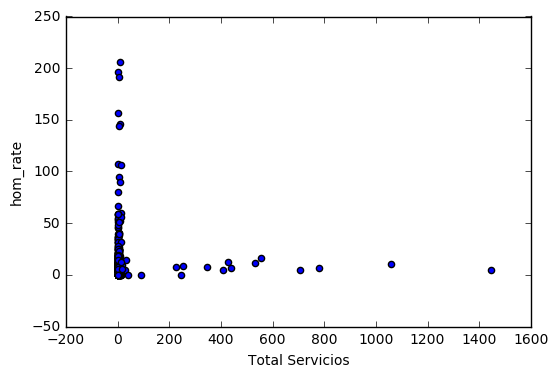

In [106]:
tot13.plot(kind = "scatter", x = "Total Servicios", y = "hom_rate")